# **A Report on HFT**

You are required to prepare a report on Algorithmic and High Frequency Trading. The word limit is 2000 (excluding reference, appendix and python codes). For the report you need to answer the following questions:

# Topic 1

Given the data in 'FB_20141126.mat', perform data analysis on it. Your description should include a report on the following points:

a.	Midprice;
b.	Microprice;
c.	Spread;
d.	Volume Imbalance.


In [1]:
# We fisrt import the packages necessary to run our analysis in this environment
import scipy.io as sc
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15,5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

/Users/HectorEnc/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### **Load Data**

In [2]:
data = sc.loadmat('FB_20141126.mat')

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [4]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

In [5]:
# Create a pandas DataFrame with t as the index
df = pd.DataFrame({
    'Midprice': midprice,
    'Microprice': microprice,
    'Spread': spread
}, index=t)

# Give the index a name
df.index.name = 'Time (seconds from trading start)'

# Show the DataFrame
df.head()

,Midprice,Microprice,Spread
Time (seconds from trading start),,,
0.1,75.485,75.498152,0.03
0.2,75.485,75.498152,0.03
0.3,75.505,75.508333,0.01
0.4,75.520,75.511818,0.02
0.5,75.520,75.511818,0.02


### Midprice, Microprice & Spread

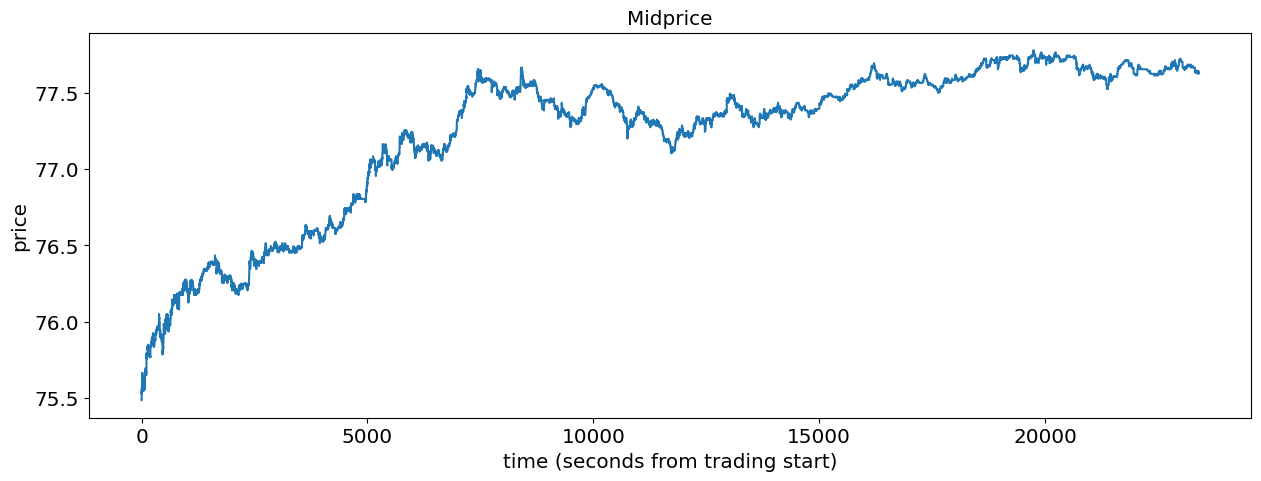

In [6]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

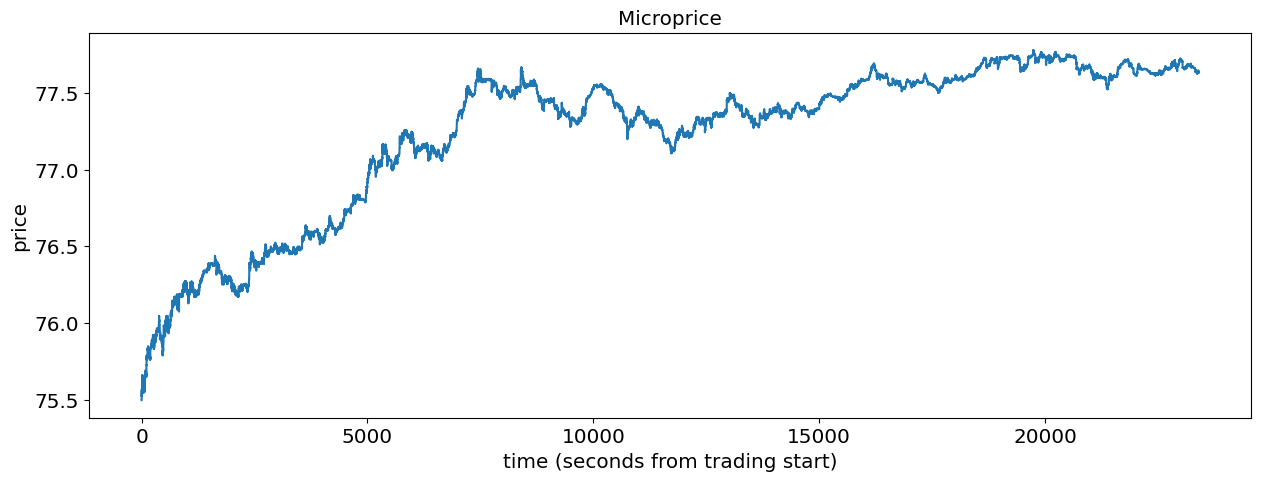

In [7]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

Microprice evolution as we observe its evolution toward this high frequency trading starting

----------------------------------------------------------------------------

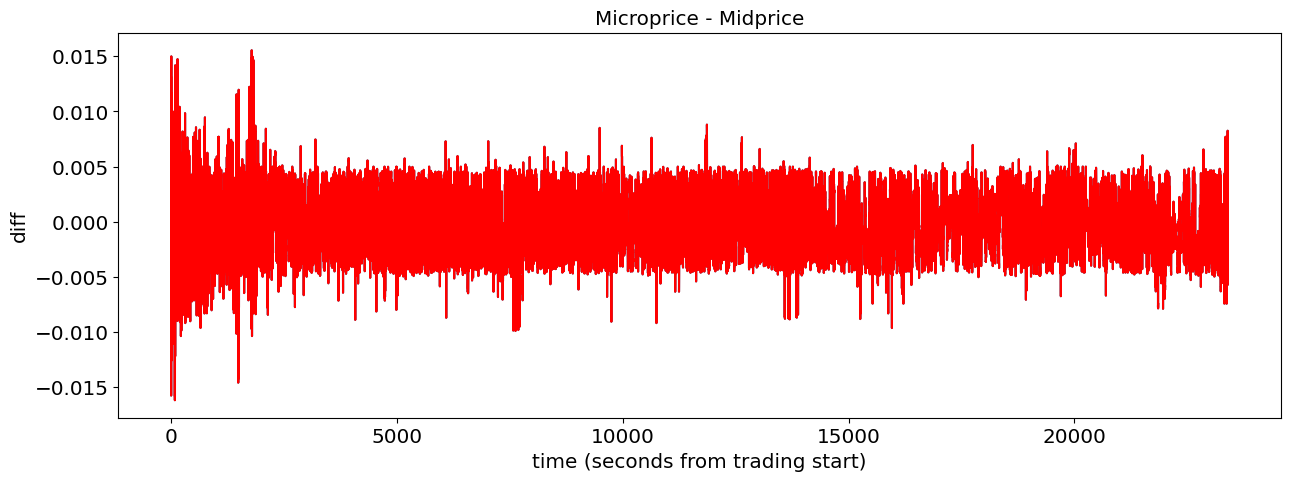

In [8]:
price_diff = microprice - midprice
plt.plot(t, price_diff)
plt.plot(t, price_diff, color='red')
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

Note that the difference is typically in the range [-0.005, 0.005] while at the beginning of the day it is three times as large [-0.015, 0.015], this is a byproduct of the vestiges or remaining effects of past transactions of the last active market trading of this stock.

---------------------------------------------

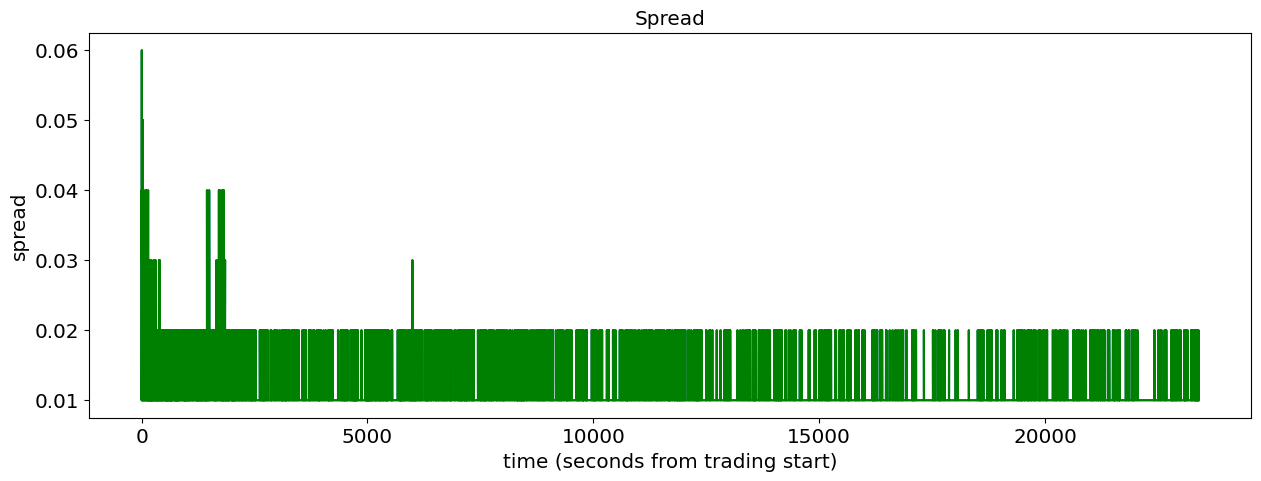

In [9]:
plt.plot(t,spread)
plt.plot(t, spread, color='green')
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

On this plot shows that the spread is about 0.06 in the begining of morning, but quickly drops to 0.02, with a slightly increase or hikes to 0.04 & 0.03 (Usually later in the morning), yet normalazing its levels to 0.02 in the rest of the estipulated trading time.

--------------------------------------------------------------------------

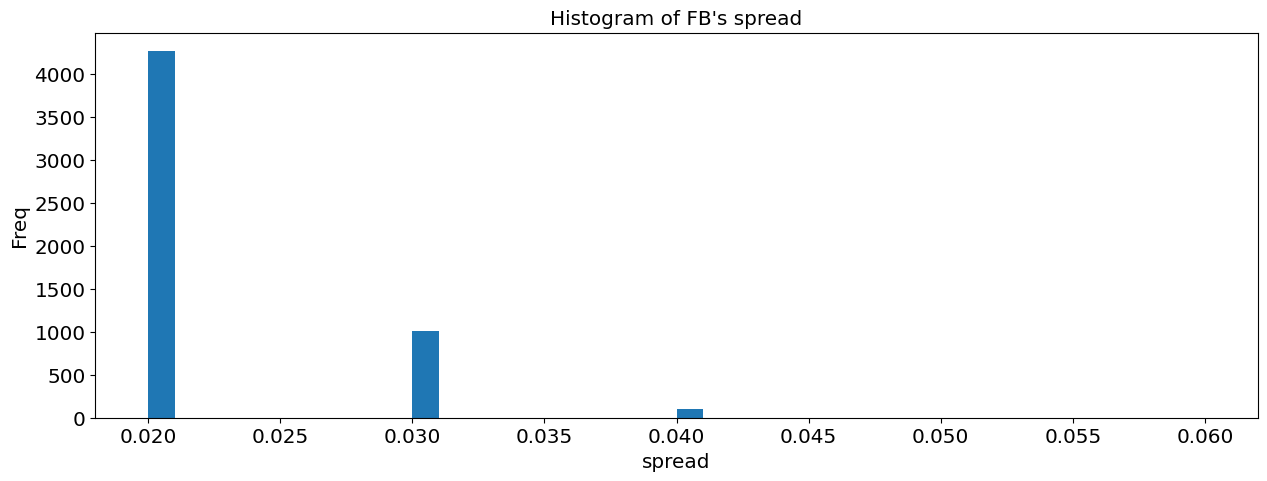

In [10]:
plt.hist(spread,bins=[0.02,0.03,0.04,0.05,0.06], width=0.001,align='mid') 
plt.title("Histogram of FB's spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

This histogram showcases in a resumed manner the latterly discussed,as we can see the distribution of the spreads and the frequency at which each of the latter happen.

-------------------------

### Volume Imbalance

In [11]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

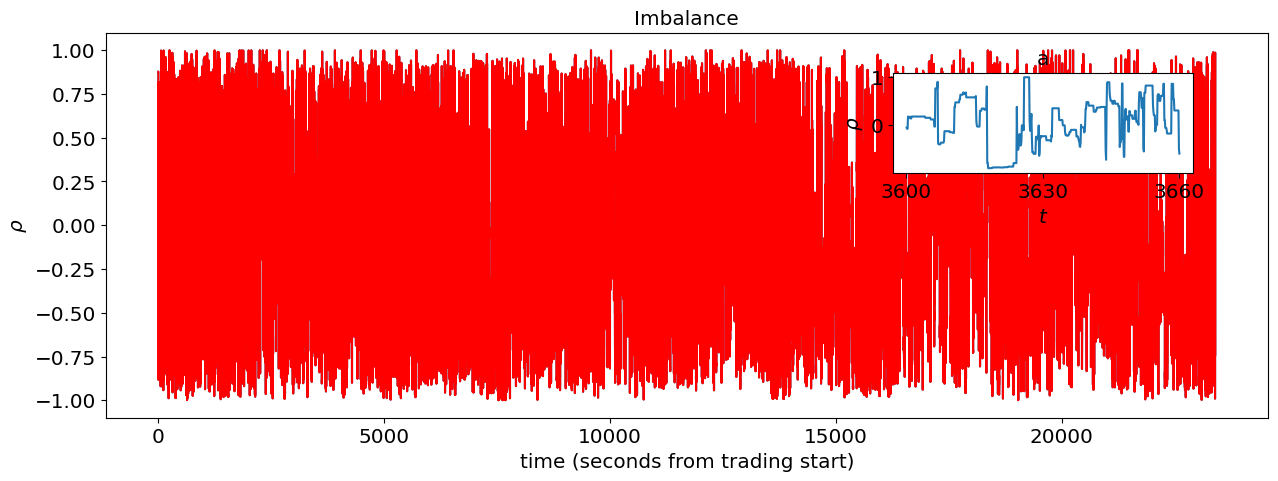

In [12]:
# Volume Imablance plots

plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')
plt.plot(t, rho, color='red')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

The Volume Imbalance is the difference between the amount of buy orders (bid volume) and sell orders (ask volume) at a particular price level or within a certain price range. An we can observe in this graph, there is a normalization of inventories in the LOB, giving us an allusion of having a neutral imbalance.

-------

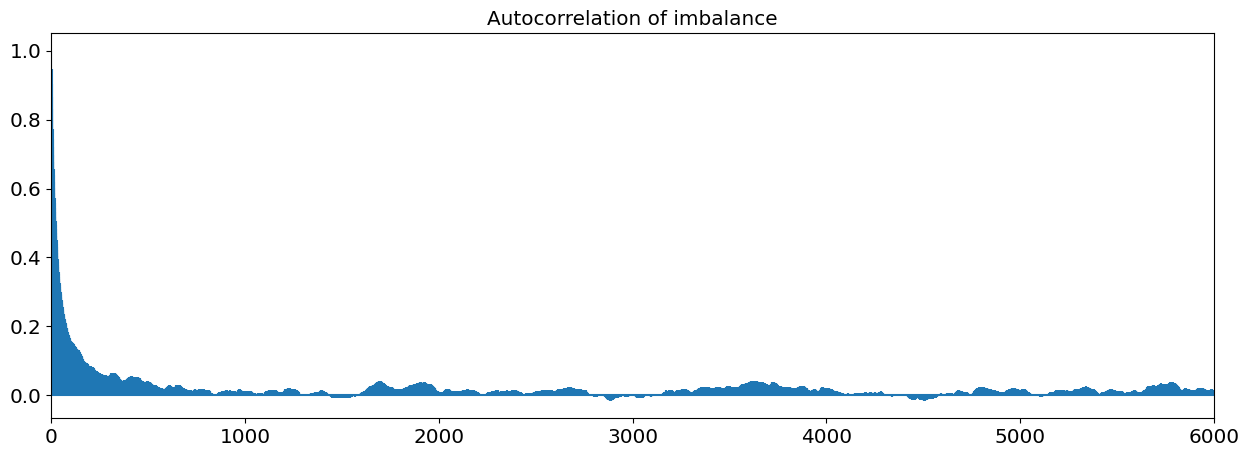

In [13]:
# Autocorrelation plot of volume imbalance

plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

We can observe kind of a positive imbalance autocorrelation, this could be happening due to the trading pressure caused by the last trading day lag, however, we can also observe hoe the same maintains in low - neutral levels in the rest of the day as well.

-----

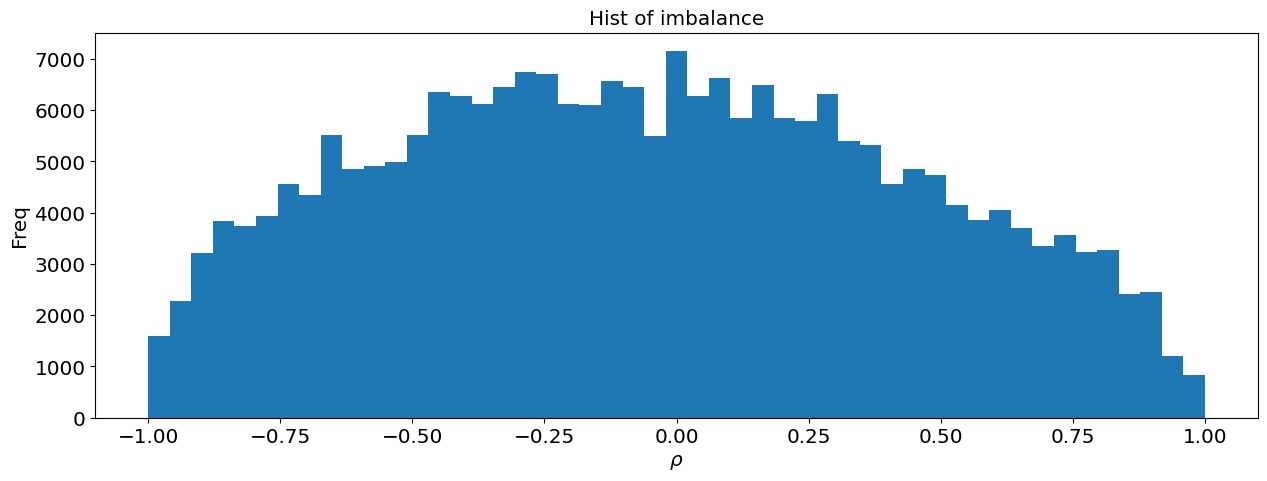

In [14]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

This Histogram signalizes that in matters of this specific trading stock, there's no particular bias towards selling or buying, however, there can be vere unfrequent slight pressures towards selling more that buying.

-----

### Volume Imbalance at times of Market Orders

In [15]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

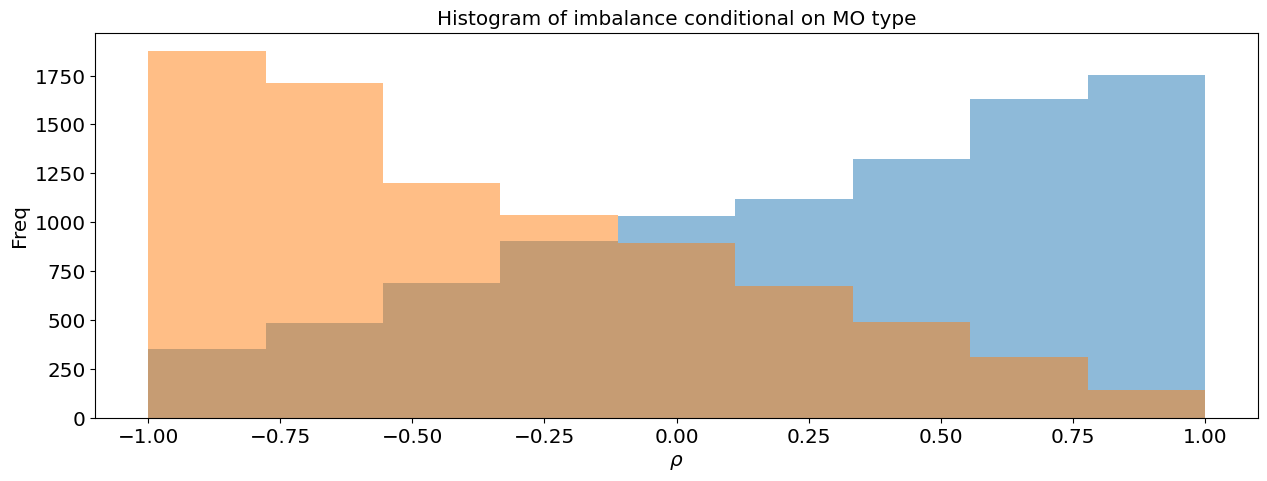

In [16]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Histogram of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

As we can observe in this volume imbalance of market ordes, there is an equilibrium between both the sales & buying orders.

-----

# Topic 2

The file ‘FTSE_sample.mat’ contains minute market order (MO) as well as best bid and best ask prices at the end of every minute of a FTSE constituent during the 2008 financial crisis.

a.	Calculate minutely returns of the stock based on mid-price and report summary statistics.

b.	Plot autocorrelation function of minutely order flows up to 20 lags. Analyse your result. Order flow is defined as net MO within each minute.

c.	Regress minutely return on return of previous minute and the contemporaneous order flow. Interpret your regression results and their implications.

d.	Develop a trading strategy based on cumulative order flows of previous 30 minutes. Estimate the cumulative return of your trading strategy.

e.	Compare the return of your strategy and the return of the stock during the whole period. Why do you make (lose) money by implementing this trading strategy?


### A) Calculating Returns

In [17]:
data = sc.loadmat('FTSE_sample.mat')
# Displaying the keys to understand the structure of the loaded data
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Bestask', 'Bestbid', 'MO'])

In [18]:
# Extracting Bestask and Bestbid

best_ask = data['Bestask']
best_bid = data['Bestbid']

# Checking the first few rows of both to understand their structure
best_ask[:5], best_bid[:5]

(array([[149.35],
        [149.35],
        [149.5 ],
        [149.95],
        [149.9 ]]),
 array([[149.1 ],
        [149.  ],
        [149.25],
        [149.85],
        [149.6 ]]))

In [19]:
# Creating a DataFrame for the analysis
df = pd.DataFrame({
    'Bestask': best_ask.squeeze(),  # Converting from 2D to 1D
    'Bestbid': best_bid.squeeze()
})

# Calculate the mid-price
df['MidPrice'] = (df['Bestask'] + df['Bestbid']) / 2

# Assuming each row represents a sequential time stamp, we simulate time index
df['Timestamp'] = pd.date_range(start='2008-01-01', periods=len(df), freq='T')
df.set_index('Timestamp', inplace=True)

# Calculating minutely returns
df['Minutely Returns'] = df['MidPrice'].pct_change()

# Summary statistics
summary_stats = df['Minutely Returns'].describe()

df

,Bestask,Bestbid,MidPrice,Minutely Returns
Timestamp,,,,
2008-01-01 00:00:00,149.35,149.10,149.225,NaN
2008-01-01 00:01:00,149.35,149.00,149.175,-0.000335
2008-01-01 00:02:00,149.50,149.25,149.375,0.001341
2008-01-01 00:03:00,149.95,149.85,149.900,0.003515
2008-01-01 00:04:00,149.90,149.60,149.750,-0.001001
...,...,...,...,...
2008-02-13 04:55:00,125.85,125.75,125.800,-0.001785
2008-02-13 04:56:00,125.95,125.85,125.900,0.000795
2008-02-13 04:57:00,126.00,125.90,125.950,0.000397


In [20]:
print(summary_stats)

count    6.221900e+04
mean    -9.544055e-07
std      1.825031e-03
min     -7.428571e-02
25%     -5.875441e-04
50%      0.000000e+00
75%      5.805515e-04
max      5.734521e-02
Name: Minutely Returns, dtype: float64


In [21]:
# Creating a table with the first five minutely returns and the summary statistics
first_five_returns = df['Minutely Returns'].head().reset_index()
summary_stats_repeated = pd.DataFrame([summary_stats.values]*5, columns=summary_stats.index)

# Combining the returns with the summary stats
summary_table = pd.concat([first_five_returns, summary_stats_repeated], axis=1)
summary_table.rename(columns={'MidPrice': 'Minutely Return'}, inplace=True)

summary_table

,Timestamp,Minutely Returns,count,mean,std,min,25%,50%,75%,max
0,2008-01-01 00:00:00,NaN,62219.0,-9.544055e-07,0.001825,-0.074286,-0.000588,0.0,0.000581,0.057345
1,2008-01-01 00:01:00,-0.000335,62219.0,-9.544055e-07,0.001825,-0.074286,-0.000588,0.0,0.000581,0.057345
2,2008-01-01 00:02:00,0.001341,62219.0,-9.544055e-07,0.001825,-0.074286,-0.000588,0.0,0.000581,0.057345
3,2008-01-01 00:03:00,0.003515,62219.0,-9.544055e-07,0.001825,-0.074286,-0.000588,0.0,0.000581,0.057345
4,2008-01-01 00:04:00,-0.001001,62219.0,-9.544055e-07,0.001825,-0.074286,-0.000588,0.0,0.000581,0.057345


### B) Autocorrelation for MOFs

In [22]:
# Checking the structure of 'MO' data
mo = data['MO'].squeeze()
mo[:5]  # Display the first few rows to understand the structure

array([  0.    ,   4.1283,  -2.8656,   5.4553, 122.4072])

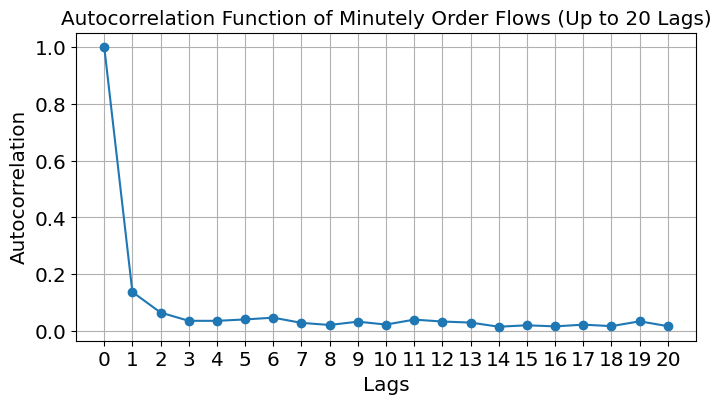

    Minutely Order Flow  Autocorrelation  Lag
0                0.0000         1.000000    0
1                4.1283         0.137780    1
2               -2.8656         0.065510    2
3                5.4553         0.036510    3
4              122.4072         0.036378    4
5                   NaN         0.041366    5
6                   NaN         0.047550    6
7                   NaN         0.029198    7
8                   NaN         0.021847    8
9                   NaN         0.033483    9
10                  NaN         0.023341   10
11                  NaN         0.040632   11
12                  NaN         0.033985   12
13                  NaN         0.030305   13
14                  NaN         0.015714   14
15                  NaN         0.020717   15
16                  NaN         0.016927   16
17                  NaN         0.023011   17
18                  NaN         0.017748   18
19                  NaN         0.034732   19
20                  NaN         0.

In [23]:
from pandas.plotting import autocorrelation_plot

# Recreating the DataFrame with MO data
mo_df = pd.DataFrame({
    'MO': mo.squeeze()  # Converting from 2D to 1D
})

# Assuming each row represents a sequential time stamp, we simulate time index
# Here we'll assume each row represents 1 minute for simplicity
mo_df['Timestamp'] = pd.date_range(start='2008-01-01', periods=len(mo_df), freq='T')
mo_df.set_index('Timestamp', inplace=True)

# Calculating autocorrelation for up to 20 lags
autocorr_results = [mo_df['MO'].autocorr(lag) for lag in range(21)]

# Plotting the autocorrelation function
plt.figure(figsize=(8, 4))
plt.plot(autocorr_results, marker='o')
plt.title('Autocorrelation Function of Minutely Order Flows (Up to 20 Lags)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.xticks(np.arange(21))
plt.grid(True)
plt.show()

# Displaying the first few values of minutely order flows

# Get the first few values of the minutely order flows
minutely_mo_head = mo_df['MO'].head()
# Convert minutely order flows to DataFrame
minutely_mo_df = minutely_mo_head.to_frame(name='Minutely Order Flow')

# Convert autocorrelation results to DataFrame
autocorr_df = pd.DataFrame(autocorr_results, columns=['Autocorrelation'])
autocorr_df['Lag'] = autocorr_df.index  # Adding a column for lags

# Concatenate horizontally
result_df = pd.concat([minutely_mo_df.reset_index(drop=True), autocorr_df], axis=1)

# Display the DataFrame
print(result_df)

In [24]:
# Sample data (replace these with your actual data)
minutely_mo_head = pd.Series([0.0000, 4.1283, -2.8656, 5.4553, 122.4072], name='Minutely Order Flow')
autocorr_results = [1.0, 0.13778043435453055, 0.06551032691213307, 0.03650962288880607, 0.036378112748137174, 0.041365838539400485, 0.047549897802593784]

# Convert minutely order flows to DataFrame
minutely_mo_df = minutely_mo_head.to_frame()

# Convert autocorrelation results to DataFrame
autocorr_df = pd.DataFrame({'Autocorrelation': autocorr_results})

# Ensure both DataFrames have the same number of rows
max_length = max(len(minutely_mo_df), len(autocorr_df))
minutely_mo_df = minutely_mo_df.reindex(range(max_length))
autocorr_df = autocorr_df.reindex(range(max_length))

# Concatenate horizontally
result_df = pd.concat([minutely_mo_df, autocorr_df], axis=1)

# Display the DataFrame as a table
result_df

,Minutely Order Flow,Autocorrelation
0,0.0000,1.000000
1,4.1283,0.137780
2,-2.8656,0.065510
3,5.4553,0.036510
4,122.4072,0.036378
5,NaN,0.041366
6,NaN,0.047550


### C) Regression of Minutely Returns

In [25]:
df['Log Returns'] = np.log(df['Minutely Returns'])
df

/Users/HectorEnc/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/HectorEnc/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Bestask,Bestbid,MidPrice,Minutely Returns,Log Returns
Timestamp,,,,,
2008-01-01 00:00:00,149.35,149.10,149.225,NaN,NaN
2008-01-01 00:01:00,149.35,149.00,149.175,-0.000335,NaN
2008-01-01 00:02:00,149.50,149.25,149.375,0.001341,-6.614558
2008-01-01 00:03:00,149.95,149.85,149.900,0.003515,-5.650817
2008-01-01 00:04:00,149.90,149.60,149.750,-0.001001,NaN
...,...,...,...,...,...
2008-02-13 04:55:00,125.85,125.75,125.800,-0.001785,NaN
2008-02-13 04:56:00,125.95,125.85,125.900,0.000795,-7.137278
2008-02-13 04:57:00,126.00,125.90,125.950,0.000397,-7.831220


In [26]:
from statsmodels.api import OLS
import statsmodels.api as sm

# Extract Bestask, Bestbid, and MO (Market Orders)
best_ask = data['Bestask'].squeeze()  # Converting from 2D to 1D
best_bid = data['Bestbid'].squeeze()
mo = data['MO'].squeeze()

# Calculate the mid-price and minutely returns
df = pd.DataFrame({'Bestask': best_ask, 'Bestbid': best_bid, 'MO': mo})
df['MidPrice'] = (df['Bestask'] + df['Bestbid']) / 2
df['Minutely Returns'] = df['MidPrice'].pct_change()

# Prepare the DataFrame for regression
# Shift the returns to get the previous minute's return
df['Lagged Returns'] = df['Minutely Returns'].shift(1)

# Use MO as a proxy for contemporaneous order flow
df['Contemporaneous Order Flow'] = df['MO']

# Drop the first row as it now contains NaN due to the shift
df = df.dropna()

# Define the dependent variable (y) and independent variables (X)
y = df['Minutely Returns']
X = df[['Lagged Returns', 'Contemporaneous Order Flow']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Get the summary of the regression
regression_summary = model.summary()
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Minutely Returns   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     4359.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:19:49   Log-Likelihood:             3.0815e+05
No. Observations:               62218   AIC:                        -6.163e+05
Df Residuals:                   62215   BIC:                        -6.163e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.725e-06   6.85e-06      0.398      0.691   -1.07e-05    1.62e-05
Lagged Returns                -0.0393      0.004    -10.463      0.000      -0.047      -0.032
Contemporaneous Order Flow  2.423e-05    2.6e-07     93.076      0.000    2.37e-05    2.47e-05
==============================================================================
Omnibus:                    36862.436   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        135562534.322
Skew:                          -1.139   Prob(JB):                         0.00
Kurtosis:                     231.663   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### D) Trading Strategy based upon CMOs

In [27]:
# Extract MO (Market Orders)
mo = data['MO'].squeeze()

# Create a DataFrame with MO and set up a time index assuming each row is one minute
df = pd.DataFrame({'MO': mo})
df.index = pd.date_range(start='2008-01-01', periods=len(df), freq='T')

# Calculate the 30-minute rolling cumulative order flow
df['Cumulative Order Flow'] = df['MO'].rolling(window=30).sum()

# Develop a trading strategy
# Buy (1) if cumulative order flow is positive, sell (-1) if negative, neutral (0) if zero
df['Trading Signal'] = np.sign(df['Cumulative Order Flow'])

# Assuming a simple trading model: buy (+1) leads to positive return, sell (-1) leads to negative return
# For this example, let's assume the return magnitude is the same for both buy and sell and is proportional to the order flow magnitude
df['Strategy Return'] = df['Trading Signal'] * df['MO']

# Estimate the cumulative return of the trading strategy
df['Cumulative Strategy Return'] = df['Strategy Return'].cumsum()

# The last value of 'Cumulative Strategy Return' is the total estimated return of the strategy
cumulative_strategy_return = df['Cumulative Strategy Return'].iloc[-1]
cumulative_strategy_return

259882.21300000083

In [28]:
df

,MO,Cumulative Order Flow,Trading Signal,Strategy Return,Cumulative Strategy Return
2008-01-01 00:00:00,0.0000,NaN,NaN,NaN,NaN
2008-01-01 00:01:00,4.1283,NaN,NaN,NaN,NaN
2008-01-01 00:02:00,-2.8656,NaN,NaN,NaN,NaN
2008-01-01 00:03:00,5.4553,NaN,NaN,NaN,NaN
2008-01-01 00:04:00,122.4072,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2008-02-13 04:55:00,-43.7396,-334.1277,-1.0,43.7396,259964.5959
2008-02-13 04:56:00,2.1216,-331.0475,-1.0,-2.1216,259962.4743
2008-02-13 04:57:00,20.9690,-322.3885,-1.0,-20.9690,259941.5053
2008-02-13 04:58:00,27.2930,-275.5376,-1.0,-27.2930,259914.2123


In [29]:
df.tail()

,MO,Cumulative Order Flow,Trading Signal,Strategy Return,Cumulative Strategy Return
2008-02-13 04:55:00,-43.7396,-334.1277,-1.0,43.7396,259964.5959
2008-02-13 04:56:00,2.1216,-331.0475,-1.0,-2.1216,259962.4743
2008-02-13 04:57:00,20.9690,-322.3885,-1.0,-20.9690,259941.5053
2008-02-13 04:58:00,27.2930,-275.5376,-1.0,-27.2930,259914.2123
2008-02-13 04:59:00,31.9993,-252.2055,-1.0,-31.9993,259882.2130


### E) Stock vs Strategy Return

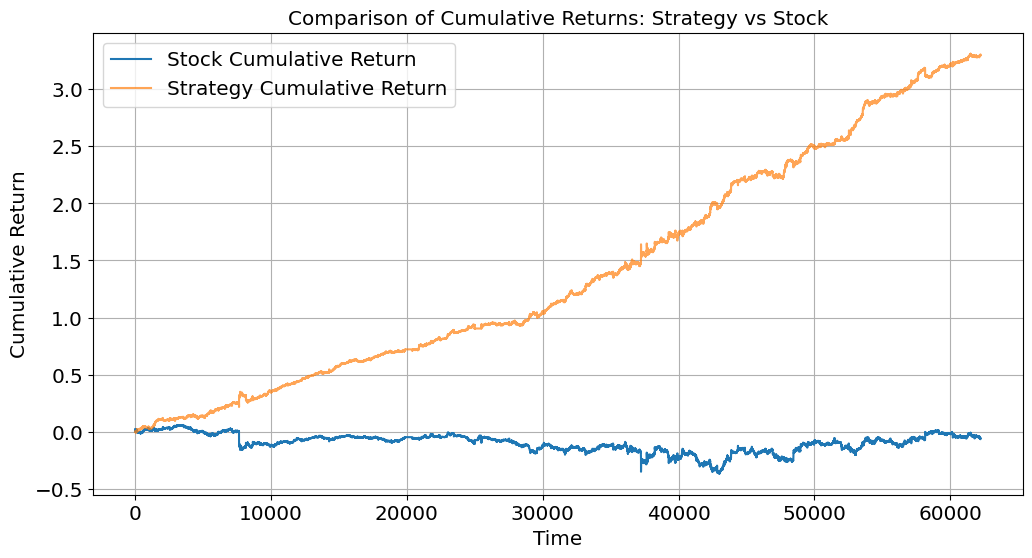

Stock Cumulative Return: -0.05938215643075195
Strategy Cumulative Return: 3.298774318439559


In [30]:
# Extract Bestask, Bestbid, and MO (Market Orders)
best_ask = data['Bestask'].squeeze()  # Converting from 2D to 1D
best_bid = data['Bestbid'].squeeze()
mo = data['MO'].squeeze()

# Calculate the mid-price and minutely returns
df = pd.DataFrame({'Bestask': best_ask, 'Bestbid': best_bid, 'MO': mo})
df['MidPrice'] = (df['Bestask'] + df['Bestbid']) / 2
df['Minutely Returns'] = df['MidPrice'].pct_change()

# Develop the trading strategy based on cumulative order flows of previous 30 minutes
df['Cumulative Order Flow'] = df['MO'].rolling(window=30).sum().fillna(0)
df['Trading Signal'] = np.sign(df['Cumulative Order Flow'])
df['Strategy Return'] = df['Trading Signal'] * df['Minutely Returns']
df['Cumulative Strategy Return'] = df['Strategy Return'].cumsum()

# Compare the return of the strategy and the return of the stock
stock_cumulative_return = df['Minutely Returns'].cumsum().iloc[-1]
strategy_cumulative_return = df['Cumulative Strategy Return'].iloc[-1]

# Plot the comparison between the strategy returns and the stock returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Minutely Returns'].cumsum(), label='Stock Cumulative Return')
plt.plot(df.index, df['Cumulative Strategy Return'], label='Strategy Cumulative Return', alpha=0.7)
plt.title('Comparison of Cumulative Returns: Strategy vs Stock')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

print("Stock Cumulative Return:", stock_cumulative_return)
print("Strategy Cumulative Return:", strategy_cumulative_return) 

In [31]:
df

,Bestask,Bestbid,MO,MidPrice,Minutely Returns,Cumulative Order Flow,Trading Signal,Strategy Return,Cumulative Strategy Return
0,149.35,149.10,0.0000,149.225,NaN,0.0000,0.0,NaN,NaN
1,149.35,149.00,4.1283,149.175,-0.000335,0.0000,0.0,-0.000000,0.000000
2,149.50,149.25,-2.8656,149.375,0.001341,0.0000,0.0,0.000000,0.000000
3,149.95,149.85,5.4553,149.900,0.003515,0.0000,0.0,0.000000,0.000000
4,149.90,149.60,122.4072,149.750,-0.001001,0.0000,0.0,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
62215,125.85,125.75,-43.7396,125.800,-0.001785,-334.1277,-1.0,0.001785,3.306319
62216,125.95,125.85,2.1216,125.900,0.000795,-331.0475,-1.0,-0.000795,3.305524
62217,126.00,125.90,20.9690,125.950,0.000397,-322.3885,-1.0,-0.000397,3.305127
62218,125.95,125.90,27.2930,125.925,-0.000198,-275.5376,-1.0,0.000198,3.305326


# Topic 3

This question is based on Glosten-Milgrom (1985) model of information asymmetry in trading. The setting is as follows:

•	The market maker(MM) quotes a bid B and ask A at time t=0;

•	The security has intrinsic value V=VH (with probability p ) or VL (with probability 1-p), VH > VL;

•	At time t=0, traders (including informed traders and liquidity traders) take action S (buy/sell one share of the security from MM).  

•	The proportion of informed traders is α and the proportion of liquidity trades is 1- α;

•	Informed traders know V at t=0;

•	Liquidity traders buy and sell with equal probabilities.

•	MM does not know whether the order comes from an informed trader or a liquidity trader.



> a.	What are the probabilities that MM receives a coming buy order if  V=VH and V= VL respectively?

> b.	What are the probabilities that MM receives a coming sell order if  V=VH and V= VL respectively?

> c.	According to Bayes Theorem, What is the probability that V=VH given that MM receives a buy order? What is the probability that V= VL given that MM receives a buy order?

> d.	According to Bayes Theorem, What is the probability that V=VH given that MM receives a sell order? What is the probability that V= VL given that MM receives a sell order?

> e.	If competition among MMs narrows their profit to 0, which means A equals to the expected value of V if the coming order is to buy (and thus the MM is to sell) , what is A?

> f.	If competition among MMs narrows their profit to 0, which means B equals to the expected value of V if the coming order is to sell (and thus the MM is to buy), what is B?

> g.	Assume that time is discrete, trading happens sequentially at t=0,1,2,3,4…. After each trade, the MM updates beliefs about V and sets A and B. What is A(k+l) and B(k+l) after k buys and l sells?

> h.	If p=0.2, α=0.8, simulate the case (for at least 50 times) if V=VH =2 (while VL =1). Plot A and B against time.







### a.

In [8]:
from sympy import symbols, Eq, solve, simplify

# Define the symbols for probabilities
P_buy_VH, P_buy_VL = symbols('P_buy_VH P_buy_VL')

alpha = symbols('alpha')

# Probability of receiving a buy order given V=VH
P_buy_VH = alpha * 1 + (1 - alpha) * 0.5

# Probability of receiving a buy order given V=VL
P_buy_VL = alpha * 0 + (1 - alpha) * 0.5

P_buy_VH, P_buy_VL


(0.5*alpha + 0.5, 0.5 - 0.5*alpha)

### b)

In [5]:
# Re-initialize the symbols
alpha = symbols('alpha')

# Calculate the probabilities
P_sell_VH = alpha * 0 + (1 - alpha) * 0.5  # Probability of a sell order given V=VH
P_sell_VL = alpha * 1 + (1 - alpha) * 0.5  # Probability of a sell order given V=VL

P_sell_VH, P_sell_VL


(0.5 - 0.5*alpha, 0.5*alpha + 0.5)

### c)

In [6]:
# Re-initialize the symbols
p, alpha = symbols('p alpha')
P_buy_VH = 0.5*alpha + 0.5  # Probability of receiving a buy order given V=VH
P_buy_VL = 0.5 - 0.5*alpha  # Probability of receiving a buy order given V=VL

# Total probability of receiving a buy order
P_buy = P_buy_VH * p + P_buy_VL * (1 - p)

# Applying Bayes' Theorem
P_VH_given_buy = (P_buy_VH * p) / P_buy
P_VL_given_buy = (P_buy_VL * (1 - p)) / P_buy

P_VH_given_buy, P_VL_given_buy


(p*(0.5*alpha + 0.5)/(p*(0.5*alpha + 0.5) + (0.5 - 0.5*alpha)*(1 - p)),
 (0.5 - 0.5*alpha)*(1 - p)/(p*(0.5*alpha + 0.5) + (0.5 - 0.5*alpha)*(1 - p)))

### d)

In [9]:
# Re-initialize the symbols
p, alpha = symbols('p alpha')

# Previously calculated probabilities of a sell order given V=VH and V=VL
P_sell_VH = 0.5 - 0.5 * alpha  # Probability of receiving a sell order given V=VH
P_sell_VL = 0.5 * alpha + 0.5  # Probability of receiving a sell order given V=VL

# Prior probabilities
P_VH = p
P_VL = 1 - p

# Total probability of a sell order
P_sell = P_sell_VH * P_VH + P_sell_VL * P_VL

# Applying Bayes' Theorem for P(V=VH|Sell)
P_VH_given_sell = simplify((P_sell_VH * P_VH) / P_sell)

# Applying Bayes' Theorem for P(V=VL|Sell)
P_VL_given_sell = simplify((P_sell_VL * P_VL) / P_sell)

P_VH_given_sell, P_VL_given_sell


(1.0*p*(alpha - 1)/(2.0*alpha*p - 1.0*alpha - 1.0),
 1.0*(alpha + 1)*(p - 1)/(p*(alpha - 1) + (alpha + 1)*(p - 1)))

### e)

In [10]:
# Re-initialize the symbols
VH, VL, p, alpha = symbols('VH VL p alpha')

# Updated probabilities after receiving a buy order
P_VH_given_buy = (p * (alpha + 1)) / (2 * alpha * p - alpha + 1)
P_VL_given_buy = ((1 - alpha) * (1 - p)) / (p * (alpha + 1) + (1 - alpha) * (1 - p))

# Expected value of V given a buy order
E_V_given_buy = VH * P_VH_given_buy + VL * P_VL_given_buy

# Ask price A in a zero-profit scenario
A = E_V_given_buy

simplify(A)


(VH*alpha*p + VH*p + VL*alpha*p - VL*alpha - VL*p + VL)/(2*alpha*p - alpha + 1)

### f)

In [11]:
# Correcting the calculation for B

# Re-define the probabilities based on Bayes' Theorem for a sell order
P_VH_given_sell = (P_sell_VH * P_VH) / P_sell
P_VL_given_sell = (P_sell_VL * P_VL) / P_sell

# Re-calculate the expected value of V given a sell order
E_V_given_sell = VH * P_VH_given_sell + VL * P_VL_given_sell

# Bid price B in a zero-profit scenario
B = E_V_given_sell

# Simplify the expression for B
B_simplified = simplify(B)

B_simplified


1.0*(VH*p*(alpha - 1) + VL*(alpha + 1)*(p - 1))/(p*(alpha - 1) + (alpha + 1)*(p - 1))

### h)

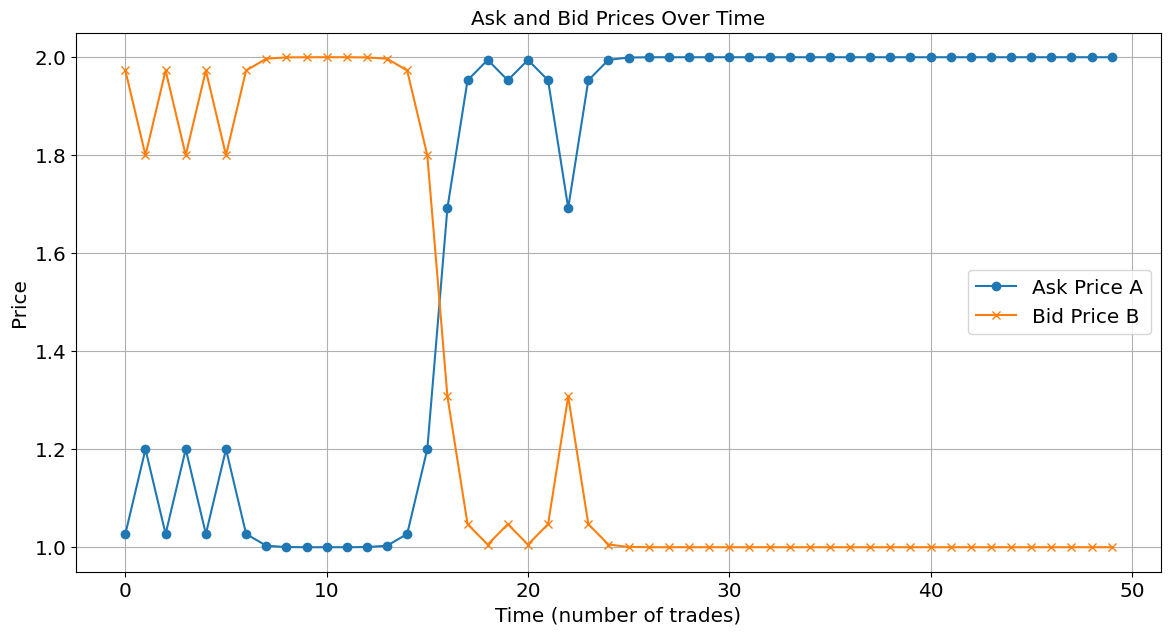

In [13]:
import random

# Set the initial conditions and constants
p_initial = 0.2
alpha = 0.8
VH = 2
VL = 1
num_trades = 50

# Initialize the lists to store the values of A and B over time
A_values = []
B_values = []
p_values = [p_initial]  # List to keep track of the probability p after each trade

# Function to update the probability p based on Bayes' Theorem
def update_p_after_buy(p, alpha, VH, VL):
    P_buy_VH = 0.5*alpha + 0.5
    P_buy_VL = 0.5 - 0.5*alpha
    P_VH_given_buy = (P_buy_VH * p) / (P_buy_VH * p + P_buy_VL * (1 - p))
    return P_VH_given_buy

def update_p_after_sell(p, alpha, VH, VL):
    P_sell_VH = 0.5 - 0.5*alpha
    P_sell_VL = 0.5*alpha + 0.5
    P_VH_given_sell = (P_sell_VH * p) / (P_sell_VH * p + P_sell_VL * (1 - p))
    return P_VH_given_sell

# Simulate the trades
for trade in range(num_trades):
    # Randomly decide if this trade is a buy or a sell
    trade_type = random.choice(['buy', 'sell'])
    
    # Update the probability p based on the type of trade
    if trade_type == 'buy':
        p_updated = update_p_after_buy(p_values[-1], alpha, VH, VL)
    else:  # 'sell'
        p_updated = update_p_after_sell(p_values[-1], alpha, VH, VL)
    
    # Update the ask and bid prices based on the new probability
    A = VH * p_updated + VL * (1 - p_updated)
    B = VH * (1 - p_updated) + VL * p_updated
    
    # Append the new values of A, B, and p to their respective lists
    A_values.append(A)
    B_values.append(B)
    p_values.append(p_updated)

# Plotting A and B over time
plt.figure(figsize=(14, 7))
plt.plot(range(num_trades), A_values, label='Ask Price A', marker='o')
plt.plot(range(num_trades), B_values, label='Bid Price B', marker='x')
plt.xlabel('Time (number of trades)')
plt.ylabel('Price')
plt.title('Ask and Bid Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()
